## Simulated Dataset KNN Analysis and Accuracy Report

In [28]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

In [39]:
# Generate artificial dataset with diff class centers using make_blobs
diff_centers = [[-6, -5], [4, 10], [9, -6]]  
# New class centers for three classes
n_classes = len(diff_centers)
data, labels = make_blobs(n_samples=150, centers=np.array(diff_centers), random_state=42)

# Split the data into 80% training and 20% testing
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

In [41]:
# Create and fit a K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_data, train_labels)

# Predict on the test data
predicted_labels = knn.predict(test_data)

# Calculate and print the accuracy score
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy on the test data:", accuracy)

Accuracy on the test data: 1.0


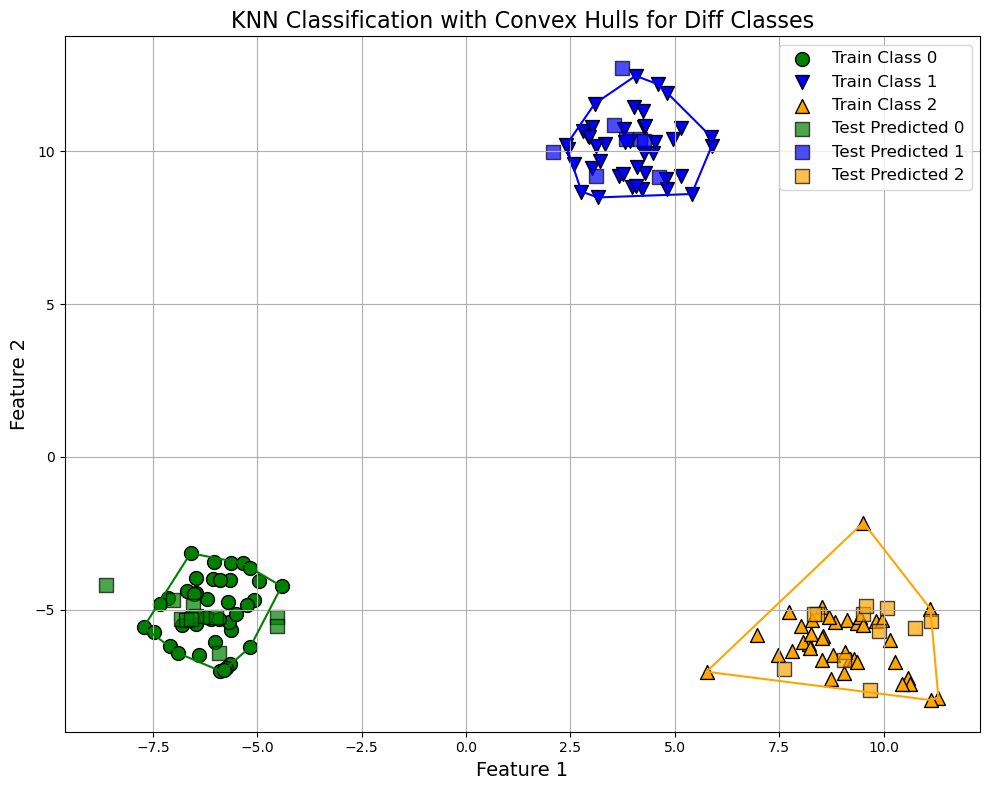

In [43]:
# Function to draw convex hull around clusters
def draw_convex_hull(points, ax, color):
    hull = ConvexHull(points)
    for simplex in hull.simplices:
        ax.plot(points[simplex, 0], points[simplex, 1], color)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 8))

# Plot training data with different markers for each class
colors = ['green', 'blue', 'orange']
markers = ['o', 'v', '^']
for class_value in np.unique(train_labels):
    ax.scatter(train_data[train_labels == class_value, 0], 
               train_data[train_labels == class_value, 1], 
               c=colors[class_value], marker=markers[class_value], 
               edgecolor='k', s=100, label=f'Train Class {class_value}')
    draw_convex_hull(train_data[train_labels == class_value], ax, colors[class_value])

# Plot test data with predicted labels using square markers
for class_value in np.unique(predicted_labels):
    ax.scatter(test_data[predicted_labels == class_value, 0], 
               test_data[predicted_labels == class_value, 1], 
               c=colors[class_value], marker='s', 
               edgecolor='k', s=100, label=f'Test Predicted {class_value}', alpha=0.7)

# Label the plot
plt.title('KNN Classification with Convex Hulls for Diff Classes', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)

# Improved legend
plt.legend(fontsize=12, loc='best')

# Add grid for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()
